In [13]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
from prophet import Prophet

In [14]:
day_dir = '../../data/ready/1-day-data/{}'
day_filenames = os.listdir(day_dir.format(''))

In [15]:
df = pd.read_csv(day_dir.format(day_filenames[0]))

In [16]:
df

,ds,open,high,low,close,macd,rsi,adx,cci
0,2017-10-02 23:59:59,4395.810059,4470.229980,4377.459961,4409.319824,76.404274,59.992753,19.974615,151.403920
1,2017-10-03 23:59:59,4408.459961,4432.470215,4258.890137,4317.479980,85.320503,57.036863,18.787460,112.788346
2,2017-10-04 23:59:59,4319.370117,4352.310059,4210.419922,4229.359863,84.304315,54.273695,17.460863,83.873827
3,2017-10-05 23:59:59,4229.879883,4362.640137,4164.049805,4328.410156,90.448870,56.806686,16.415504,79.977985
4,2017-10-06 23:59:59,4324.459961,4413.270020,4320.529785,4370.810059,97.614553,57.882226,15.294155,92.800380
...,...,...,...,...,...,...,...,...,...
1240,2021-02-23 23:59:59,54204.929756,54204.929756,45290.590268,48824.426869,4566.049082,55.360778,38.924607,30.133858
1241,2021-02-24 23:59:59,48835.087661,51290.136695,47213.498162,49705.333316,4126.268801,56.875394,36.602798,22.800770
1242,2021-02-25 23:59:59,49709.082425,51948.966982,47093.853019,47093.853019,3526.365381,51.316544,34.627863,2.374072
1243,2021-02-26 23:59:59,47180.464054,48370.785260,44454.842114,46339.760083,2956.013517,49.802852,32.328988,-54.009679


In [17]:
fig_nonstationary = px.line(x=df.ds, y = df.close)
fig_nonstationary.show()

In [18]:
df['growth'] = 0

In [22]:
df['lag'] = df.close.shift(periods=1)

In [23]:
df

,ds,open,high,low,close,macd,rsi,adx,cci,growth,lag
0,2017-10-02 23:59:59,4395.810059,4470.229980,4377.459961,4409.319824,76.404274,59.992753,19.974615,151.403920,0,NaN
1,2017-10-03 23:59:59,4408.459961,4432.470215,4258.890137,4317.479980,85.320503,57.036863,18.787460,112.788346,0,4409.319824
2,2017-10-04 23:59:59,4319.370117,4352.310059,4210.419922,4229.359863,84.304315,54.273695,17.460863,83.873827,0,4317.479980
3,2017-10-05 23:59:59,4229.879883,4362.640137,4164.049805,4328.410156,90.448870,56.806686,16.415504,79.977985,0,4229.359863
4,2017-10-06 23:59:59,4324.459961,4413.270020,4320.529785,4370.810059,97.614553,57.882226,15.294155,92.800380,0,4328.410156
...,...,...,...,...,...,...,...,...,...,...,...
1240,2021-02-23 23:59:59,54204.929756,54204.929756,45290.590268,48824.426869,4566.049082,55.360778,38.924607,30.133858,0,54207.319065
1241,2021-02-24 23:59:59,48835.087661,51290.136695,47213.498162,49705.333316,4126.268801,56.875394,36.602798,22.800770,0,48824.426869
1242,2021-02-25 23:59:59,49709.082425,51948.966982,47093.853019,47093.853019,3526.365381,51.316544,34.627863,2.374072,0,49705.333316
1243,2021-02-26 23:59:59,47180.464054,48370.785260,44454.842114,46339.760083,2956.013517,49.802852,32.328988,-54.009679,0,47093.853019


In [24]:
df.growth = (np.log(df.close) - np.log(df.lag)) * 100

In [25]:
df

,ds,open,high,low,close,macd,rsi,adx,cci,growth,lag
0,2017-10-02 23:59:59,4395.810059,4470.229980,4377.459961,4409.319824,76.404274,59.992753,19.974615,151.403920,NaN,NaN
1,2017-10-03 23:59:59,4408.459961,4432.470215,4258.890137,4317.479980,85.320503,57.036863,18.787460,112.788346,-2.104855,4409.319824
2,2017-10-04 23:59:59,4319.370117,4352.310059,4210.419922,4229.359863,84.304315,54.273695,17.460863,83.873827,-2.062125,4317.479980
3,2017-10-05 23:59:59,4229.879883,4362.640137,4164.049805,4328.410156,90.448870,56.806686,16.415504,79.977985,2.314966,4229.359863
4,2017-10-06 23:59:59,4324.459961,4413.270020,4320.529785,4370.810059,97.614553,57.882226,15.294155,92.800380,0.974805,4328.410156
...,...,...,...,...,...,...,...,...,...,...,...
1240,2021-02-23 23:59:59,54204.929756,54204.929756,45290.590268,48824.426869,4566.049082,55.360778,38.924607,30.133858,-10.458520,54207.319065
1241,2021-02-24 23:59:59,48835.087661,51290.136695,47213.498162,49705.333316,4126.268801,56.875394,36.602798,22.800770,1.788150,48824.426869
1242,2021-02-25 23:59:59,49709.082425,51948.966982,47093.853019,47093.853019,3526.365381,51.316544,34.627863,2.374072,-5.396975,49705.333316
1243,2021-02-26 23:59:59,47180.464054,48370.785260,44454.842114,46339.760083,2956.013517,49.802852,32.328988,-54.009679,-1.614214,47093.853019


In [51]:
fig = px.line(x=df.ds, y=df.growth)
fig.show()

In [79]:
df['y'] = df['growth']

In [80]:
df_train, df_test = df.iloc[:-200, :].copy(), df.iloc[-200:,:]

In [81]:
df_train.shape

(1045, 12)

In [82]:
df_test.shape

(200, 12)

In [83]:
df_ready.ds = pd.to_datetime(df.ds)
df_ready.y = df.growth

In [128]:
m = Prophet(seasonality_mode='additive', daily_seasonality=True, weekly_seasonality=False, yearly_seasonality=False, mcmc_samples=200)

In [129]:
m.fit(df_train)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [130]:
future = m.make_future_dataframe(periods=200, freq='D')

In [131]:
future

,ds
0,2017-10-02 23:59:59
1,2017-10-03 23:59:59
2,2017-10-04 23:59:59
3,2017-10-05 23:59:59
4,2017-10-06 23:59:59
...,...
1240,2021-02-23 23:59:59
1241,2021-02-24 23:59:59
1242,2021-02-25 23:59:59
1243,2021-02-26 23:59:59


In [132]:
forecast = m.predict(future)

In [133]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-10-02 23:59:59,-119.742236,-4.636314,6.620480,-345.728784,48.002970,120.901961,-47.217272,346.863128,120.901961,-47.217272,346.863128,0.0,0.0,0.0,1.159726
1,2017-10-03 23:59:59,-119.751102,-4.394334,6.732834,-345.738536,48.001743,120.901961,-47.217272,346.863128,120.901961,-47.217272,346.863128,0.0,0.0,0.0,1.150860
2,2017-10-04 23:59:59,-119.759967,-4.381141,6.717442,-345.748288,48.000517,120.901961,-47.217272,346.863128,120.901961,-47.217272,346.863128,0.0,0.0,0.0,1.141994
3,2017-10-05 23:59:59,-119.768833,-4.356134,6.827727,-345.758040,47.999291,120.901961,-47.217272,346.863128,120.901961,-47.217272,346.863128,0.0,0.0,0.0,1.133128
4,2017-10-06 23:59:59,-119.777699,-4.348990,6.790075,-345.767793,47.996830,120.901961,-47.217272,346.863128,120.901961,-47.217272,346.863128,0.0,0.0,0.0,1.124263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,2021-02-23 23:59:59,-120.383134,-5.023456,6.295220,-345.317428,47.833690,120.901961,-47.217272,346.863128,120.901961,-47.217272,346.863128,0.0,0.0,0.0,0.518827
1241,2021-02-24 23:59:59,-120.381963,-5.370937,6.131269,-345.302281,47.837025,120.901961,-47.217272,346.863128,120.901961,-47.217272,346.863128,0.0,0.0,0.0,0.519998
1242,2021-02-25 23:59:59,-120.380792,-5.002851,6.446532,-345.287134,47.840360,120.901961,-47.217272,346.863128,120.901961,-47.217272,346.863128,0.0,0.0,0.0,0.521170
1243,2021-02-26 23:59:59,-120.379621,-5.191061,6.152290,-345.271987,47.843695,120.901961,-47.217272,346.863128,120.901961,-47.217272,346.863128,0.0,0.0,0.0,0.522341


In [134]:
fig = px.line(x=df_ready.ds, y=df_ready.y)
fig.add_scatter(x=forecast.ds, y=forecast.yhat, mode='lines')
fig.show()

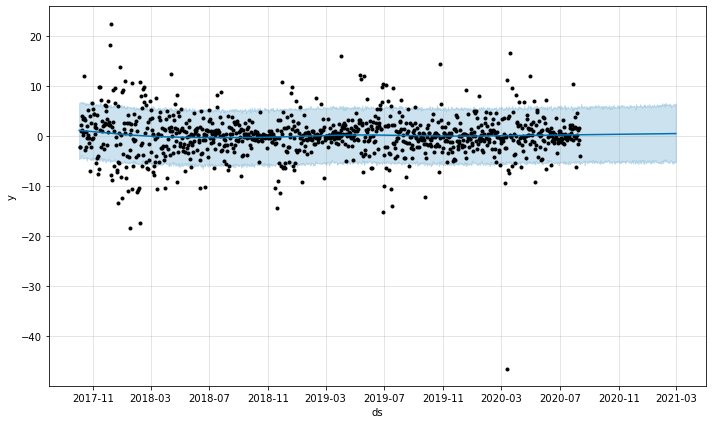

In [135]:
fig=m.plot(forecast)

In [10]:
from rnn import RNN

In [26]:
df['close_actual'] = df['close']

In [27]:
df['close'] = df['growth']

In [29]:
df.index=df.ds
df.drop(['ds'], inplace=True, axis=1)

In [30]:
df

,open,high,low,close,macd,rsi,adx,cci,growth,lag,close_actual
ds,,,,,,,,,,,
2017-10-02 23:59:59,4395.810059,4470.229980,4377.459961,NaN,76.404274,59.992753,19.974615,151.403920,NaN,NaN,4409.319824
2017-10-03 23:59:59,4408.459961,4432.470215,4258.890137,-2.104855,85.320503,57.036863,18.787460,112.788346,-2.104855,4409.319824,4317.479980
2017-10-04 23:59:59,4319.370117,4352.310059,4210.419922,-2.062125,84.304315,54.273695,17.460863,83.873827,-2.062125,4317.479980,4229.359863
2017-10-05 23:59:59,4229.879883,4362.640137,4164.049805,2.314966,90.448870,56.806686,16.415504,79.977985,2.314966,4229.359863,4328.410156
2017-10-06 23:59:59,4324.459961,4413.270020,4320.529785,0.974805,97.614553,57.882226,15.294155,92.800380,0.974805,4328.410156,4370.810059
...,...,...,...,...,...,...,...,...,...,...,...
2021-02-23 23:59:59,54204.929756,54204.929756,45290.590268,-10.458520,4566.049082,55.360778,38.924607,30.133858,-10.458520,54207.319065,48824.426869
2021-02-24 23:59:59,48835.087661,51290.136695,47213.498162,1.788150,4126.268801,56.875394,36.602798,22.800770,1.788150,48824.426869,49705.333316
2021-02-25 23:59:59,49709.082425,51948.966982,47093.853019,-5.396975,3526.365381,51.316544,34.627863,2.374072,-5.396975,49705.333316,47093.853019


In [31]:
m = RNN.LTSM(df[['open', 'high', 'low', 'close', 'macd','rsi','adx','cci']], n_steps=7, shuffle=True, split_by_date=True, lookup_step=1)

In [32]:
m.load_data()

/home/oddgrad/thesis/RL_Crypto_Trading/notebooks/forecasting/rnn/RNN.py:85: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/oddgrad/thesis/RL_Crypto_Trading/notebooks/forecasting/rnn/RNN.py:91: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/oddgrad/thesis/RL_Crypto_Trading/notebooks/forecasting/rnn/RNN.py:91: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [34]:
fig = px.line(x=m.df.index, y=m.df.close)
fig.show()

In [35]:
m.data['test_df']

,open,high,low,close,macd,rsi,adx,cci
ds,,,,,,,,
2020-11-08 23:59:59,14833.754084,15637.320338,14744.109896,4.261563,913.605260,74.139622,55.160350,155.281442
2020-12-30 23:59:59,27360.089709,28937.740004,27360.089709,5.262523,2307.615433,82.455801,50.089457,152.227455
2020-10-13 23:59:59,11548.719759,11548.984832,11321.224513,-1.126699,154.613622,62.782707,21.328117,167.007958
2021-01-30 23:59:59,34295.935044,34834.708301,32940.186914,-0.136664,399.615663,53.715539,24.047889,-12.101670
2020-09-30 23:59:59,10843.870751,10847.256993,10669.321093,-0.556190,-39.369919,50.207475,17.126549,28.667350
...,...,...,...,...,...,...,...,...
2021-02-12 23:59:59,47877.034375,48745.733800,46424.977818,-0.847846,3585.934841,72.476185,29.874359,147.775593
2021-01-14 23:59:59,37325.107635,39966.405242,36868.563245,4.892161,3849.373568,69.175375,44.964198,94.190088
2020-12-09 23:59:59,18320.884784,18626.292652,17935.547820,1.262499,725.172855,55.244329,35.684381,-24.291253


In [36]:
m.create_model()

In [37]:
m.train(epochs=400)

In [38]:
m.predict()

In [39]:
m.data['test_df']

,open,high,low,close,macd,rsi,adx,cci,yhat
ds,,,,,,,,,
2020-11-08 23:59:59,14833.754084,15637.320338,14744.109896,4.261563,913.605260,74.139622,55.160350,155.281442,0.537129
2020-12-30 23:59:59,27360.089709,28937.740004,27360.089709,5.262523,2307.615433,82.455801,50.089457,152.227455,-3.717578
2020-10-13 23:59:59,11548.719759,11548.984832,11321.224513,-1.126699,154.613622,62.782707,21.328117,167.007958,-0.050220
2021-01-30 23:59:59,34295.935044,34834.708301,32940.186914,-0.136664,399.615663,53.715539,24.047889,-12.101670,-11.194929
2020-09-30 23:59:59,10843.870751,10847.256993,10669.321093,-0.556190,-39.369919,50.207475,17.126549,28.667350,-0.524592
...,...,...,...,...,...,...,...,...,...
2021-02-12 23:59:59,47877.034375,48745.733800,46424.977818,-0.847846,3585.934841,72.476185,29.874359,147.775593,-115.717751
2021-01-14 23:59:59,37325.107635,39966.405242,36868.563245,4.892161,3849.373568,69.175375,44.964198,94.190088,5.639353
2020-12-09 23:59:59,18320.884784,18626.292652,17935.547820,1.262499,725.172855,55.244329,35.684381,-24.291253,-1.651865


In [40]:
m.plot_forecasts()

In [42]:
m.get_metrics()

R^2 Score: -226.35271316314459
MAE: 17.110681820560345
MSE: 2819.5287019623547
RMSE: 53.09923447623661


[-226.35271316314459,
 17.110681820560345,
 2819.5287019623547,
 53.09923447623661]